In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("AdjustedClosingPrices.csv")

In [3]:
df.dtypes

Date     object
A       float64
AA      float64
AAPL    float64
ABC     float64
ABT     float64
ACS     float64
ADBE    float64
ADI     float64
ADM     float64
ADP     float64
ADSK    float64
AEE     float64
AEP     float64
AES     float64
AET     float64
AFL     float64
AGN     float64
AIG     float64
AIV     float64
AIZ     float64
AKAM    float64
AKS     float64
ALL     float64
AMAT    float64
AMD     float64
AMGN    float64
AMP     float64
AMT     float64
AMZN    float64
         ...   
VMC     float64
VNO     float64
VRSN    float64
VTR     float64
VZ      float64
WAT     float64
WDC     float64
WEC     float64
WFC     float64
WFR     float64
WHR     float64
WIN     float64
WM      float64
WMB     float64
WMT     float64
WPI     float64
WU      float64
WY      float64
WYN     float64
WYNN    float64
X       float64
XEL     float64
XL      float64
XLNX    float64
XOM     float64
XRAY    float64
XRX     float64
YHOO    float64
YUM     float64
ZION    float64
Length: 468, dtype: obje

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(3)

,Date,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
0,2000-01-03,46.354670,30.172580,3.660058,3.326019,9.639804,0.019,16.274667,32.947692,7.912229,...,25.380447,8.810155,32.639550,35.933610,26.056526,7.151686,19.207609,118.750,7.452527,43.820247
1,2000-01-04,42.813681,30.312376,3.351477,3.098946,9.364382,0.019,14.909395,31.280900,7.829816,...,24.433043,9.013020,31.170373,35.116937,25.557438,7.151686,18.314232,110.750,7.302727,41.698321
2,2000-01-05,40.157947,32.059823,3.400523,3.339381,9.347165,0.019,15.204175,31.737555,7.706187,...,24.682360,9.360790,31.448326,34.348304,26.950724,7.275321,19.257241,102.625,7.340181,41.648973


In [5]:
df = df.set_index('Date')
df.head(3)

,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,46.354670,30.172580,3.660058,3.326019,9.639804,0.019,16.274667,32.947692,7.912229,29.184633,...,25.380447,8.810155,32.639550,35.933610,26.056526,7.151686,19.207609,118.750,7.452527,43.820247
2000-01-04,42.813681,30.312376,3.351477,3.098946,9.364382,0.019,14.909395,31.280900,7.829816,29.184633,...,24.433043,9.013020,31.170373,35.116937,25.557438,7.151686,18.314232,110.750,7.302727,41.698321
2000-01-05,40.157947,32.059823,3.400523,3.339381,9.347165,0.019,15.204175,31.737555,7.706187,28.904013,...,24.682360,9.360790,31.448326,34.348304,26.950724,7.275321,19.257241,102.625,7.340181,41.648973


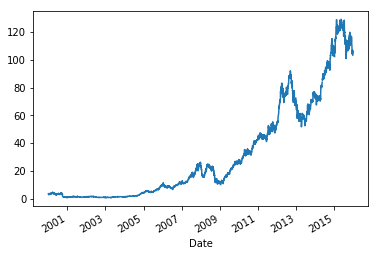

In [6]:
df.AAPL.plot()

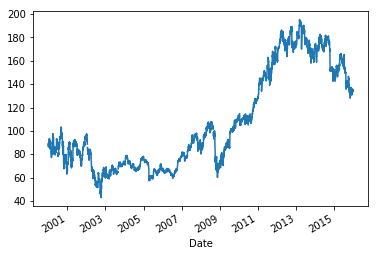

In [7]:
df.IBM.plot()

In [8]:
df.isnull().sum().sum()

184024

In [9]:
(df==0).sum().sum()

1801

In [10]:
df1 = df.replace(0, np.nan)

In [11]:
(df1==0).sum().sum()

0

In [12]:
df1 = df1.fillna(method='ffill',axis=0).fillna(method='bfill',axis=0)

In [13]:
df1.isnull().sum().sum()

0

In [14]:
df_log = np.log(df1)

In [15]:
df_r = df_log - df_log.shift()
df_r.head(3)

,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.079464,0.004623,-0.088078,-0.070714,-0.028987,0.0,-0.087618,-0.051914,-0.010471,0.000000,...,-0.038043,0.022765,-0.046057,-0.022990,-0.019340,0.00000,-0.047628,-0.069745,-0.020305,-0.049635
2000-01-05,-0.064037,0.056048,0.014528,0.074723,-0.001840,0.0,0.019579,0.014493,-0.015915,-0.009662,...,0.010152,0.037859,0.008878,-0.022131,0.053082,0.01714,0.050209,-0.076194,0.005116,-0.001184


In [16]:
df_r1 = df_r.drop(df_r.index[0])
df_r1.head(3)

,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.079464,0.004623,-0.088078,-0.070714,-0.028987,0.0,-0.087618,-0.051914,-0.010471,0.000000,...,-0.038043,0.022765,-0.046057,-0.022990,-0.019340,0.000000,-0.047628,-0.069745,-0.020305,-0.049635
2000-01-05,-0.064037,0.056048,0.014528,0.074723,-0.001840,0.0,0.019579,0.014493,-0.015915,-0.009662,...,0.010152,0.037859,0.008878,-0.022131,0.053082,0.017140,0.050209,-0.076194,0.005116,-0.001184
2000-01-06,-0.038820,-0.013168,-0.090514,0.073249,0.034393,0.0,0.008130,-0.027719,0.005333,0.013261,...,0.006042,-0.009331,0.007547,-0.090705,0.050406,0.001307,-0.020834,-0.108784,-0.008539,0.014118


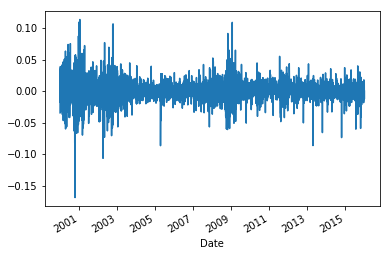

In [17]:
df_r1.IBM.plot()

In [18]:
IBM_LR = pd.DataFrame()
IBM_LR['yesterday'] = df_r1.IBM.shift(periods=2).values[2:]
IBM_LR['today'] = df_r1.IBM.shift(periods=1).values[2:]
IBM_LR['tomorrow'] = df_r1.IBM.values[2:]
IBM_LR['bias'] = 1
IBM_LR.head(3)

,yesterday,today,tomorrow,bias
0,-0.034533,0.034533,-0.017392,1
1,0.034533,-0.017392,-0.004396,1
2,-0.017392,-0.004396,0.038882,1


In [19]:
X = IBM_LR[['yesterday','today','bias']].values
y = IBM_LR['tomorrow'].values
A = np.matmul(X.T,X)
b = np.matmul(X.T,y)
wopt = np.linalg.solve(A,b)
wopt

array([-0.01872106, -0.04186459,  0.00010331])

In [20]:
def RMSE(yh,y):
    return np.sqrt(((yh-y)**2).mean())

In [21]:
yh = np.matmul(X,wopt)
RMSE(yh,y)

0.016496408360083384

In [22]:
y.std()

0.01651325665216701